# UTS Penambangan Data

## DATA UNDERSTANDING

### MENAMPILKAN DATA

In [1]:
import pandas as pd
from IPython.display import display, HTML


In [5]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("cirrhosis.csv")


Saving cirrhosis.csv to cirrhosis.csv


In [6]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [7]:
html_table = data.to_html(classes='table table-striped', border=0)
display(HTML(f"""
<div style="height: 500px; overflow-y: scroll; border:1px solid #ddd; padding:10px">
{html_table}
</div>
"""))

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
5,6,2503,D,Placebo,24201,F,N,Y,N,N,0.8,248.0,3.98,50.0,944.0,93.00,63.0,NaN,11.0,3.0
6,7,1832,C,Placebo,20284,F,N,Y,N,N,1.0,322.0,4.09,52.0,824.0,60.45,213.0,204.0,9.7,3.0
7,8,2466,D,Placebo,19379,F,N,N,N,N,0.3,280.0,4.00,52.0,4651.2,28.38,189.0,373.0,11.0,3.0
8,9,2400,D,D-penicillamine,15526,F,N,N,Y,N,3.2,562.0,3.08,79.0,2276.0,144.15,88.0,251.0,11.0,2.0
9,10,51,D,Placebo,25772,F,Y,N,Y,Y,12.6,200.0,2.74,140.0,918.0,147.25,143.0,302.0,11.5,4.0


### MENAMPILKAN DATA NUMERIK

In [8]:
data = data.drop(columns=["ID"])


numerical_data = data.select_dtypes(include='number')

stats = pd.DataFrame({
    'mean': numerical_data.mean(),
    'median': numerical_data.median(),
    'count': numerical_data.count(),
    'std': numerical_data.std(),
    'min': numerical_data.min(),
    'max': numerical_data.max()
})

html_table = stats.to_html(classes='table table-bordered', border=0)
display(HTML(f"""
<div style="max-height: 400px; overflow-y: auto; border:1px solid #ccc; padding:10px">
{html_table}
</div>
"""))

,mean,median,count,std,min,max
N_Days,1917.782297,1730.00,418,1104.672992,41.00,4795.00
Age,18533.351675,18628.00,418,3815.845055,9598.00,28650.00
Bilirubin,3.220813,1.40,418,4.407506,0.30,28.00
Cholesterol,369.510563,309.50,284,231.944545,120.00,1775.00
Albumin,3.497440,3.53,418,0.424972,1.96,4.64
Copper,97.648387,73.00,310,85.613920,4.00,588.00
Alk_Phos,1982.655769,1259.00,312,2140.388824,289.00,13862.40
SGOT,122.556346,114.70,312,56.699525,26.35,457.25
Tryglicerides,124.702128,108.00,282,65.148639,33.00,598.00
Platelets,257.024570,251.00,407,98.325585,62.00,721.00


### MENAMPILKAN DATA DALAM BENTUK CHART


Statistik untuk variabel numerik: N_Days
count     418.000000
mean     1917.782297
std      1104.672992
min        41.000000
25%      1092.750000
50%      1730.000000
75%      2613.500000
max      4795.000000
Name: N_Days, dtype: float64


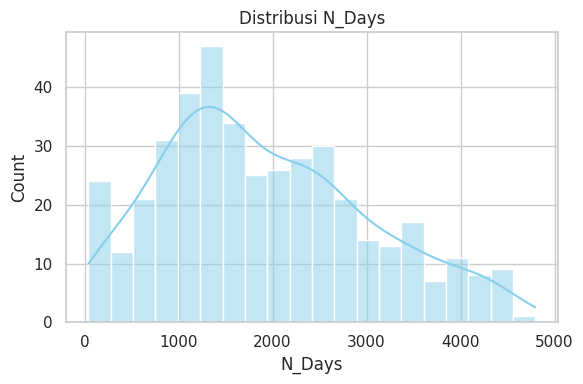

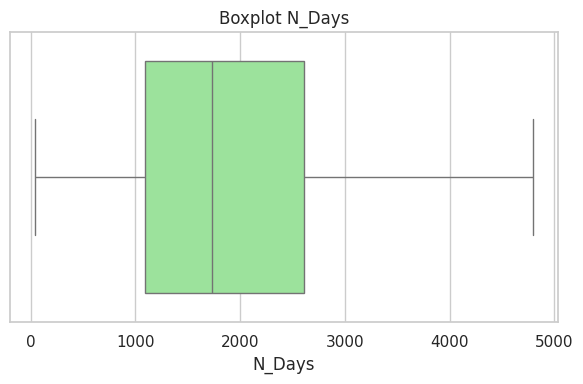


Statistik untuk variabel numerik: Age
count      418.000000
mean     18533.351675
std       3815.845055
min       9598.000000
25%      15644.500000
50%      18628.000000
75%      21272.500000
max      28650.000000
Name: Age, dtype: float64


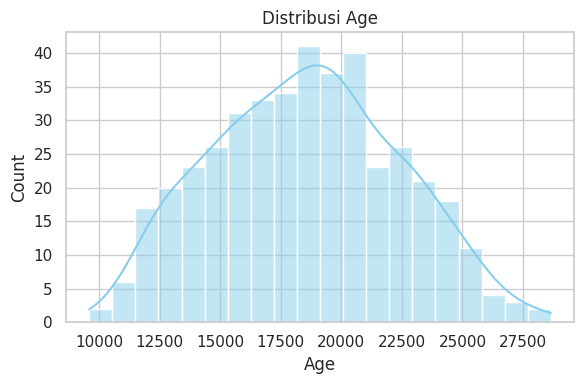

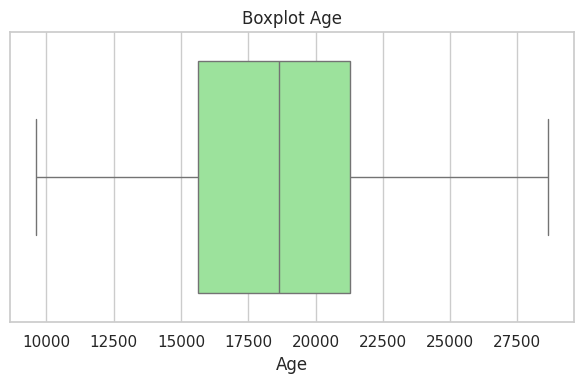


Statistik untuk variabel numerik: Bilirubin
count    418.000000
mean       3.220813
std        4.407506
min        0.300000
25%        0.800000
50%        1.400000
75%        3.400000
max       28.000000
Name: Bilirubin, dtype: float64


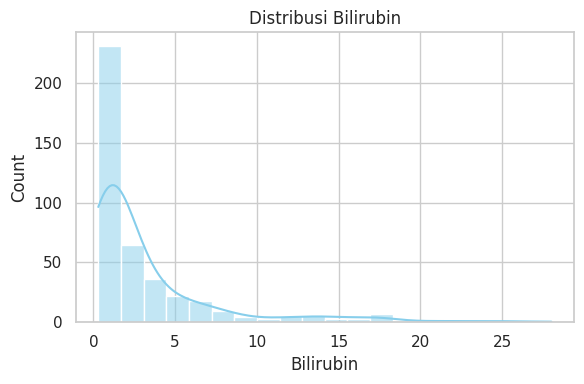

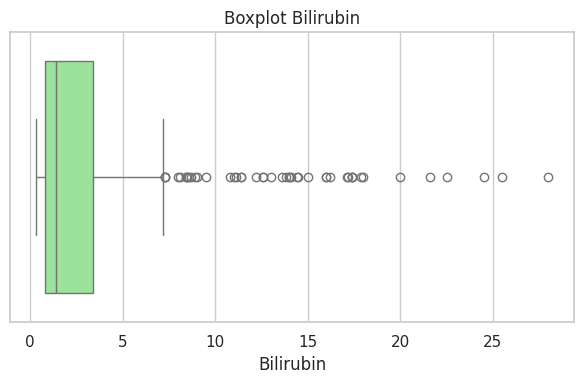


Statistik untuk variabel numerik: Cholesterol
count     284.000000
mean      369.510563
std       231.944545
min       120.000000
25%       249.500000
50%       309.500000
75%       400.000000
max      1775.000000
Name: Cholesterol, dtype: float64


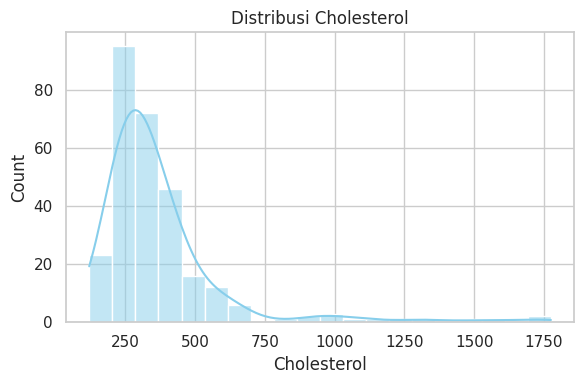

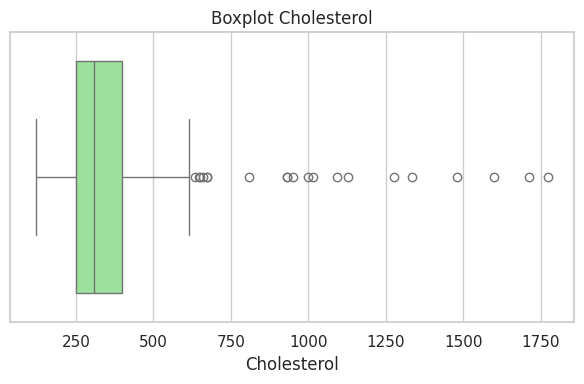


Statistik untuk variabel numerik: Albumin
count    418.000000
mean       3.497440
std        0.424972
min        1.960000
25%        3.242500
50%        3.530000
75%        3.770000
max        4.640000
Name: Albumin, dtype: float64


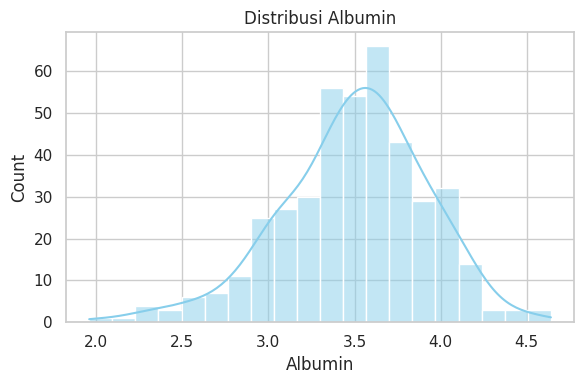

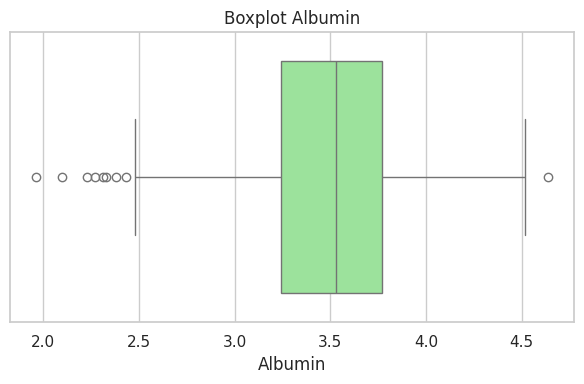


Statistik untuk variabel numerik: Copper
count    310.000000
mean      97.648387
std       85.613920
min        4.000000
25%       41.250000
50%       73.000000
75%      123.000000
max      588.000000
Name: Copper, dtype: float64


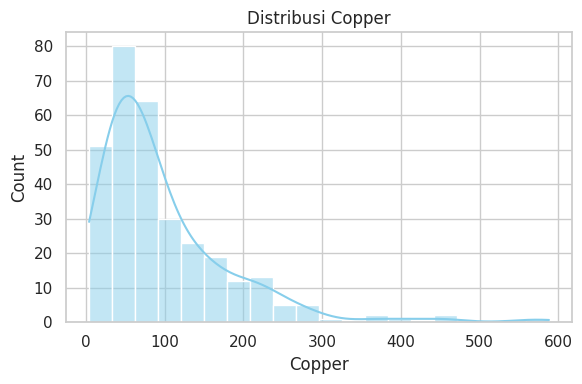

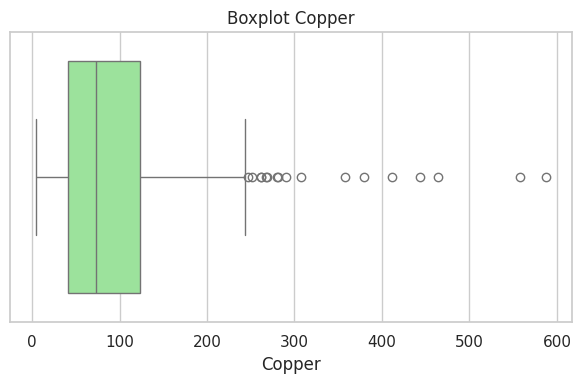


Statistik untuk variabel numerik: Alk_Phos
count      312.000000
mean      1982.655769
std       2140.388824
min        289.000000
25%        871.500000
50%       1259.000000
75%       1980.000000
max      13862.400000
Name: Alk_Phos, dtype: float64


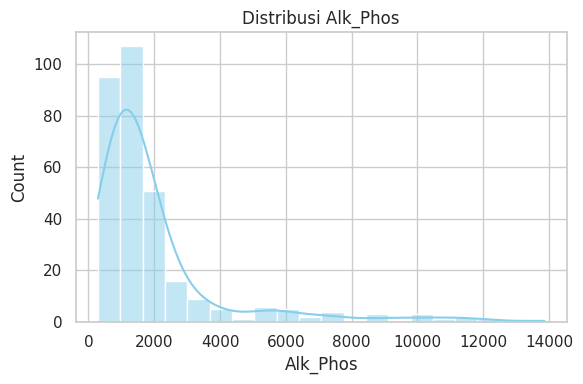

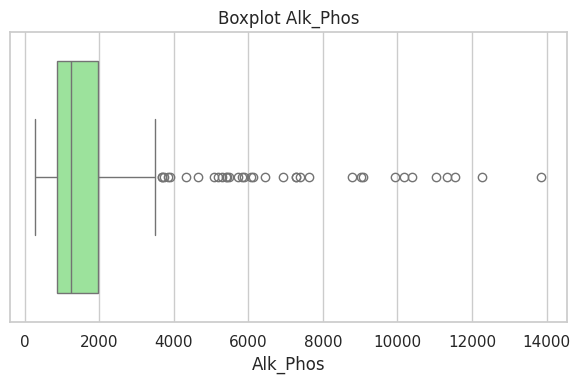


Statistik untuk variabel numerik: SGOT
count    312.000000
mean     122.556346
std       56.699525
min       26.350000
25%       80.600000
50%      114.700000
75%      151.900000
max      457.250000
Name: SGOT, dtype: float64


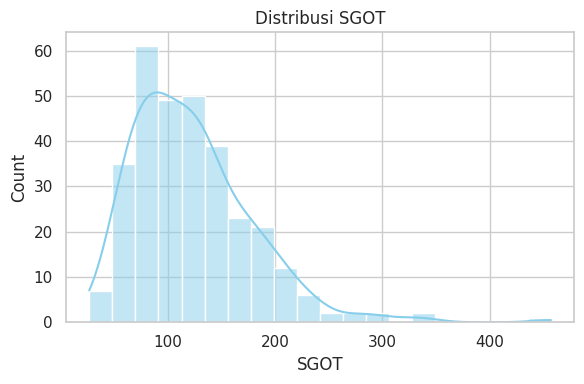

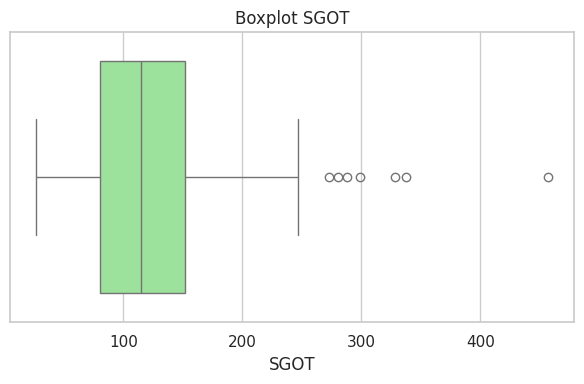


Statistik untuk variabel numerik: Tryglicerides
count    282.000000
mean     124.702128
std       65.148639
min       33.000000
25%       84.250000
50%      108.000000
75%      151.000000
max      598.000000
Name: Tryglicerides, dtype: float64


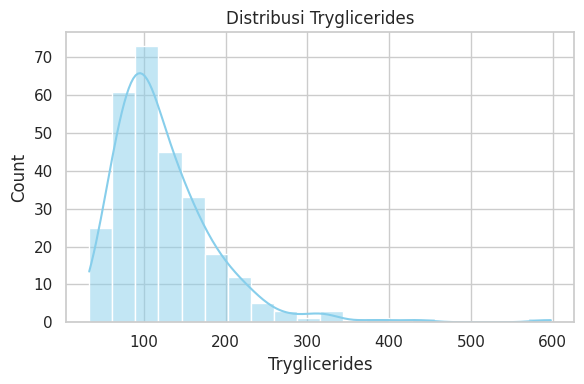

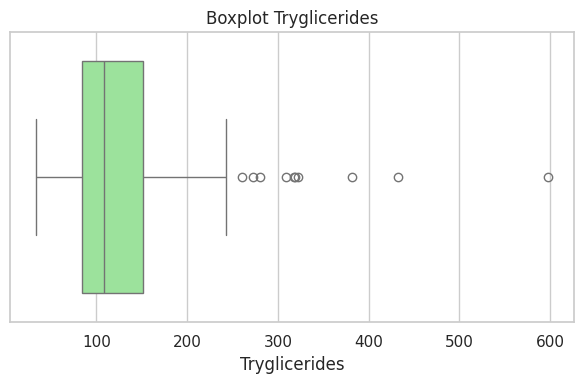


Statistik untuk variabel numerik: Platelets
count    407.000000
mean     257.024570
std       98.325585
min       62.000000
25%      188.500000
50%      251.000000
75%      318.000000
max      721.000000
Name: Platelets, dtype: float64


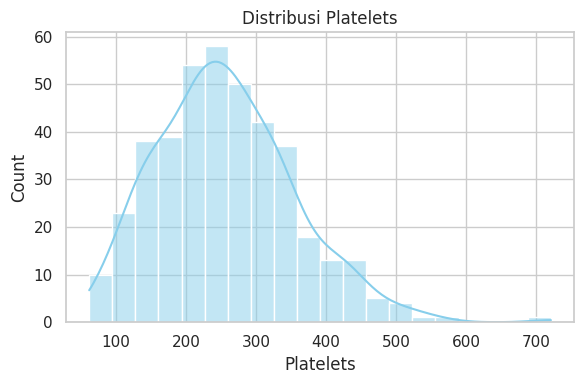

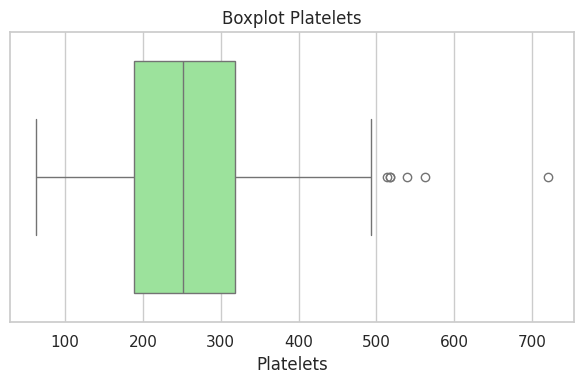


Statistik untuk variabel numerik: Prothrombin
count    416.000000
mean      10.731731
std        1.022000
min        9.000000
25%       10.000000
50%       10.600000
75%       11.100000
max       18.000000
Name: Prothrombin, dtype: float64


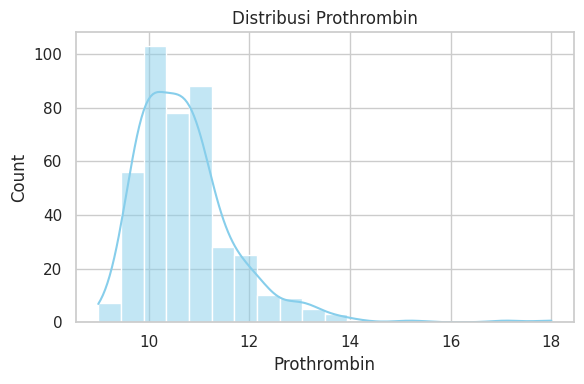

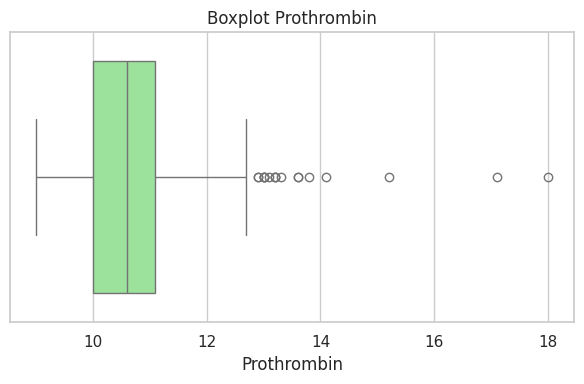


Statistik untuk variabel numerik: Stage
count    412.000000
mean       3.024272
std        0.882042
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Stage, dtype: float64


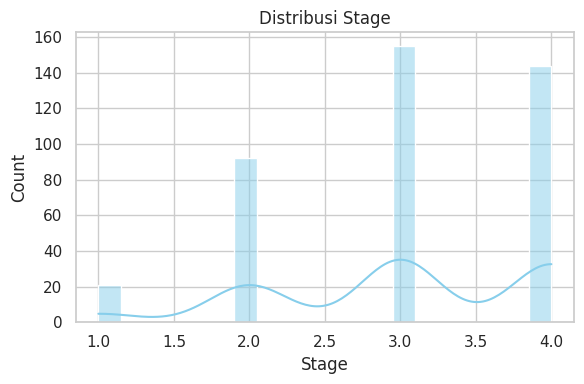

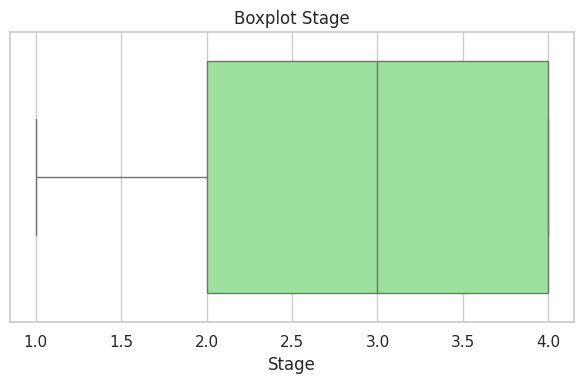

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil kolom numerik
numerical_cols = data.select_dtypes(include='number').columns

# Set gaya untuk plot
sns.set(style="whitegrid")

# 2. Menampilkan statistik dan visualisasi untuk tiap kolom numerik
for col in numerical_cols:
    print(f"\nStatistik untuk variabel numerik: {col}")
    print(data[col].describe())

    # Plot Histogram
    plt.figure(figsize=(6,4))
    # The color argument in kde_kws was removed.
    sns.histplot(data[col], kde=True, bins=20, color='skyblue', line_kws={'color': 'red'})
    plt.title(f"Distribusi {col}")
    plt.tight_layout()
    plt.show()

    # Plot Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f"Boxplot {col}")
    plt.tight_layout()
    plt.show()

## PREPROCESSING DATA

### CEK MISSING VALUE

In [19]:
# --- Tahap 1: Cek dan Tangani Missing Values (dengan kondisi) ---

missing_before = data.isnull().sum()
total_missing = missing_before.sum()

if total_missing == 0:
    print(" Tidak ditemukan missing value di dalam dataset.")
else:
    from tabulate import tabulate

    missing_table = tabulate(missing_before.reset_index(), headers=["Kolom", "Missing Values"], tablefmt="grid")
    print(" Ditemukan missing values sebelum ditangani:\n")
    print(missing_table)

    # Tangani missing values
    for col in data.columns:
        if data[col].dtype == 'object':
            data[col] = data[col].fillna(data[col].mode()[0])
        else:
            data[col] = data[col].fillna(data[col].median())

    # Verifikasi ulang setelah ditangani
    missing_after = data.isnull().sum()
    print("\n Missing value setelah ditangani:")
    print(tabulate(missing_after.reset_index(), headers=["Kolom", "Missing Values"], tablefmt="grid"))


✅ Tidak ditemukan missing value di dalam dataset.


### DETEKSI OUTLIER

In [23]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler

# Ambil data numerik & normalisasi agar jarak lebih adil
numerical_data = data.select_dtypes(include=np.number)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Hitung centroid (rata-rata) dan Euclidean distance tiap titik ke pusat
center = np.mean(scaled_data, axis=0)
distances = np.linalg.norm(scaled_data - center, axis=1)

# Threshold outlier: data dengan jarak > mean + 3*std dianggap outlier
threshold = distances.mean() + 3 * distances.std()
outlier_indices = np.where(distances > threshold)[0]

print(f"Jumlah outlier terdeteksi: {len(outlier_indices)}")

# Tampilkan beberapa contoh
print("\nContoh indeks outlier:")
print(outlier_indices[:10])


Jumlah outlier terdeteksi: 7

Contoh indeks outlier:
[ 17  22  74 129 165 190 280]


### PENGHAPUSAN OUTLIER

In [24]:
# tanpa outlier
data_no_outliers = data.drop(index=outlier_indices).reset_index(drop=True)

print(f"Jumlah data sebelum hapus outlier: {data.shape[0]}")
print(f"Jumlah data setelah hapus outlier: {data_no_outliers.shape[0]}")


Jumlah data sebelum hapus outlier: 418
Jumlah data setelah hapus outlier: 411


## PEMODELAN

In [34]:
# Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Tentukan fitur dan target
feature_columns = numerical_data.columns.drop("N_Days")  # sesuaikan dengan fitur numerik lainnya
X = numerical_data[feature_columns]
y = data["Stage"]  # Target adalah "Stage"

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Menampilkan beberapa data awal
X.head(), y_encoded[:5]


(   Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  Bilirubin  \
 0       2     0  21464    0        1             1        1      2       14.5   
 1       0     0  20617    0        0             1        1      0        1.1   
 2       2     0  25594    1        0             0        0      1        1.4   
 3       2     0  19994    0        0             1        1      1        1.8   
 4       1     1  13918    0        0             1        1      0        3.4   
 
    Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  Platelets  \
 0        261.0     2.60   156.0    1718.0  137.95          172.0      190.0   
 1        302.0     4.14    54.0    7394.8  113.52           88.0      221.0   
 2        176.0     3.48   210.0     516.0   96.10           55.0      151.0   
 3        244.0     2.54    64.0    6121.8   60.63           92.0      183.0   
 4        279.0     3.53   143.0     671.0  113.15           72.0      136.0   
 
    Prothrombin  Stage  

#### MODEL DENGAN OUTLIER

In [36]:
# Import Libraries untuk Model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Pembagian data menjadi train dan test
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

# Buat pipeline dengan scaler dan KNN
pipeline_ori = Pipeline([
    ("scaler", StandardScaler()),  # Normalisasi fitur
    ("knn", KNeighborsClassifier(n_neighbors=11))  # KNN dengan 11 tetangga
])

# Latih model
pipeline_ori.fit(X_train_ori, y_train_ori)

# Prediksi dengan data uji
y_pred_ori = pipeline_ori.predict(X_test_ori)

# Tampilkan hasil evaluasi model dengan outlier
print("\nHASIL MODEL DENGAN OUTLIER:")
# Convert label_encoder.classes_ to a list of strings
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_ori, y_pred_ori, target_names=target_names))
print(f"Akurasi: {accuracy_score(y_test_ori, y_pred_ori):.4f}")


HASIL MODEL DENGAN OUTLIER:
              precision    recall  f1-score   support

         1.0       1.00      0.33      0.50         3
         2.0       0.67      0.50      0.57        16
         3.0       0.57      0.76      0.65        34
         4.0       0.76      0.61      0.68        31

    accuracy                           0.64        84
   macro avg       0.75      0.55      0.60        84
weighted avg       0.67      0.64      0.64        84

Akurasi: 0.6429


#### MODEL TANPA OUTLIER

In [39]:
# Pembagian data bersih menjadi train dan test
X_clean = df_cleaned[feature_columns]
y_clean = df_cleaned["Stage"]  # Ambil kolom 'Stage' sebagai target

X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# Buat pipeline untuk model tanpa outlier
pipeline_clean = Pipeline([
    ("scaler", StandardScaler()),  # Normalisasi fitur
    ("knn", KNeighborsClassifier(n_neighbors=11))  # KNN dengan 11 tetangga
])

# Latih model dengan data bersih
pipeline_clean.fit(X_train_clean, y_train_clean)

# Prediksi dengan data uji
y_pred_clean = pipeline_clean.predict(X_test_clean)

# Tampilkan hasil evaluasi model setelah outlier dihapus
print("\nHASIL MODEL SETELAH OUTLIER DIHAPUS:")
# Get target names as strings from the label encoder
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_test_clean, y_pred_clean, target_names=target_names))
print(f"Akurasi: {accuracy_score(y_test_clean, y_pred_clean):.4f}")


HASIL MODEL SETELAH OUTLIER DIHAPUS:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         7
         2.0       0.44      0.73      0.55        11
         3.0       0.59      0.74      0.66        27
         4.0       0.83      0.65      0.73        31

    accuracy                           0.63        76
   macro avg       0.47      0.53      0.48        76
weighted avg       0.61      0.63      0.61        76

Akurasi: 0.6316


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
